<a href="https://colab.research.google.com/github/psgrigoletti/margem-liquida-colab/blob/main/2022_11_19_testando_max_drawdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawdown





## Conceitos:
- Drawdown: é uma métrica que indica quanto foi a queda do valor de um ativo em relação a sua cotação máxima. Assim, ele pode ser utilizado para entender quanto dinheiro o investidor perdeu, de forma percentual, em determinado investimento durante um período, por exemplo.




## Etapas:
- Imports
- Buscar dados de um índice
- Plotar dados de fechamento
- Plotar o Wealth Index
- Plotar os picos
- Plotar o Drawdown
- Calcular o MDD do período
- Criar uma carteira fictícia
- Plotar o Drawdown da carteira
- Calcular o MDD da carteira no período

# Links:
- https://www.suno.com.br/artigos/drawdown/
- https://www.youtube.com/watch?v=_LhK6aX35IM

# Imports

In [141]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dados

Buscando dados do IBOV desde 01/01/2010. 

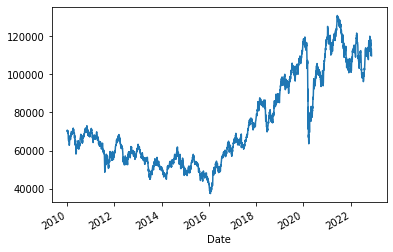

In [147]:
ibov = yf.Ticker("^BVSP")
dados = ibov.history(start = '2010-01-01', end = '2022-11-18')
df = pd.DataFrame(dados)
df['Close'].plot()

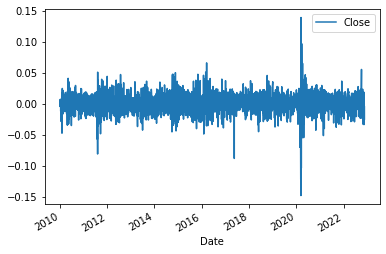

In [164]:
fechamentos = df['Close'];
retornos = pd.DataFrame(fechamentos.pct_change().iloc[1: ])
retornos.plot()

# Calculando o Wealth Index
Índice de riqueza, é uma maneira de demonstrar o que aconteceria se eu pagasse um montante e deixasse no mesmo investimento duranto todo o período de tempo.

In [165]:
# Investindo R$ 1000 no índice
wealth_index = pd.DataFrame(1000 * (retornos + 1).cumprod())
wealth_index

,Close
Date,
2010-01-05 00:00:00-02:00,1002.783925
2010-01-06 00:00:00-02:00,1009.765151
2010-01-07 00:00:00-02:00,1005.796274
2010-01-08 00:00:00-02:00,1003.112285
2010-01-11 00:00:00-02:00,1005.539296
...,...
2022-11-10 00:00:00-03:00,1567.206796
2022-11-11 00:00:00-03:00,1596.402313
2022-11-14 00:00:00-03:00,1615.547148


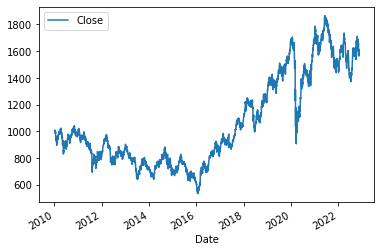

In [166]:
wealth_index.plot()

# Calculando os picos
Picos são os valores máximos, seja ele local (de uma parte do período) ou global (de todo o período).

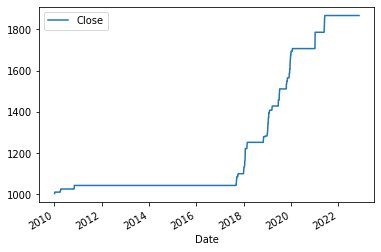

In [167]:
picos = pd.DataFrame(wealth_index.cummax())
picos.plot()

# Finalmente calculando o Drawdown

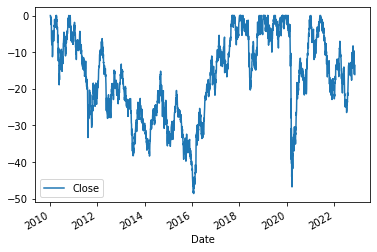

In [168]:
drawdown = pd.DataFrame(((wealth_index - picos)/picos) * 100)
drawdown.plot()

# Drawdown máximo no período

In [169]:
drawdown_maximo_no_periodo = abs(drawdown.min())
drawdown_maximo_no_periodo

Close    48.631432
dtype: float64

# Juntando tudo

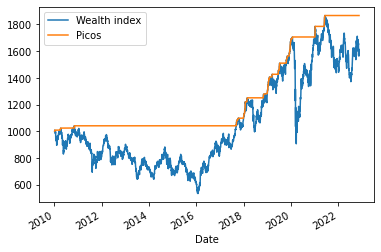

In [173]:
junto = retornos
junto['Wealth index'] = wealth_index
junto['Picos'] = picos
junto['Drawdown'] = drawdown
junto[['Wealth index', 'Picos']].plot()

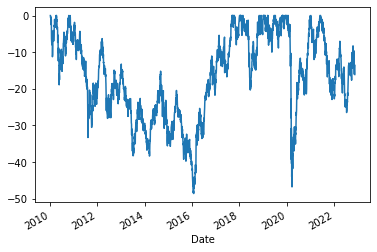

In [174]:
junto['Drawdown'].plot()